In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# Loading data

In [2]:
data = pd.read_csv('data_no_mising_value_cat_col.csv')
data.head()

,brand,3G,4G,5G,Announced,Weight,Length,Width,Diameter,Display Type,...,3.5mm jack,Chipset,RAM,Storage,Micro-SIM,Mini-SIM,Nano-SIM,eSIM,ratio_1,ratio_2
0,alcatel,True,True,False,2022,172.0,146.7,71.9,10.0,TFT,...,True,Mediatek,2.0,32.0,False,False,True,False,18.0,9.0
1,alcatel,True,True,False,2021,190.0,156.4,74.8,9.7,IPS,...,True,Unisoc,2.0,32.0,False,False,True,False,5.0,9.0
2,alcatel,True,True,False,2021,134.0,137.6,65.7,9.8,TFT,...,True,Mediatek,1.0,8.0,False,False,True,False,18.0,9.0
3,alcatel,True,True,False,2021,194.0,165.6,75.6,8.7,IPS,...,True,Mediatek,4.0,64.0,False,False,True,False,20.0,9.0
4,alcatel,True,True,False,2021,190.0,165.6,75.6,8.8,IPS,...,True,Mediatek,3.0,32.0,False,False,True,False,20.0,9.0


In [171]:
X = data[['battery_capacity', 'Price']]

In [241]:
X_scaled = MinMaxScaler().fit_transform(X)

# Section 1

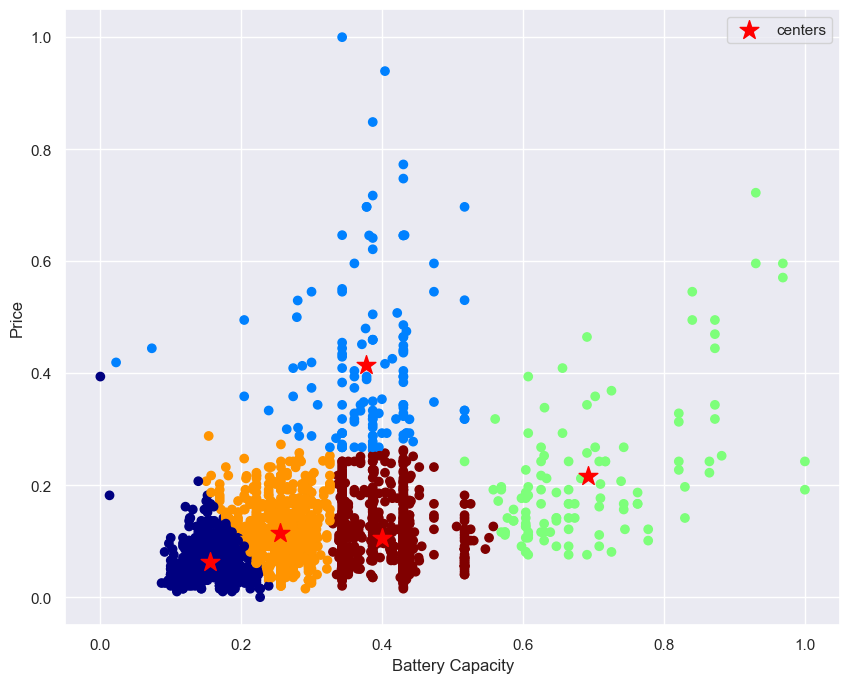

In [242]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
lables = kmeans.labels_
centers = kmeans.cluster_centers_
sns.set_theme()
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=lables, cmap='jet')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200, label='centers')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

# Section 2

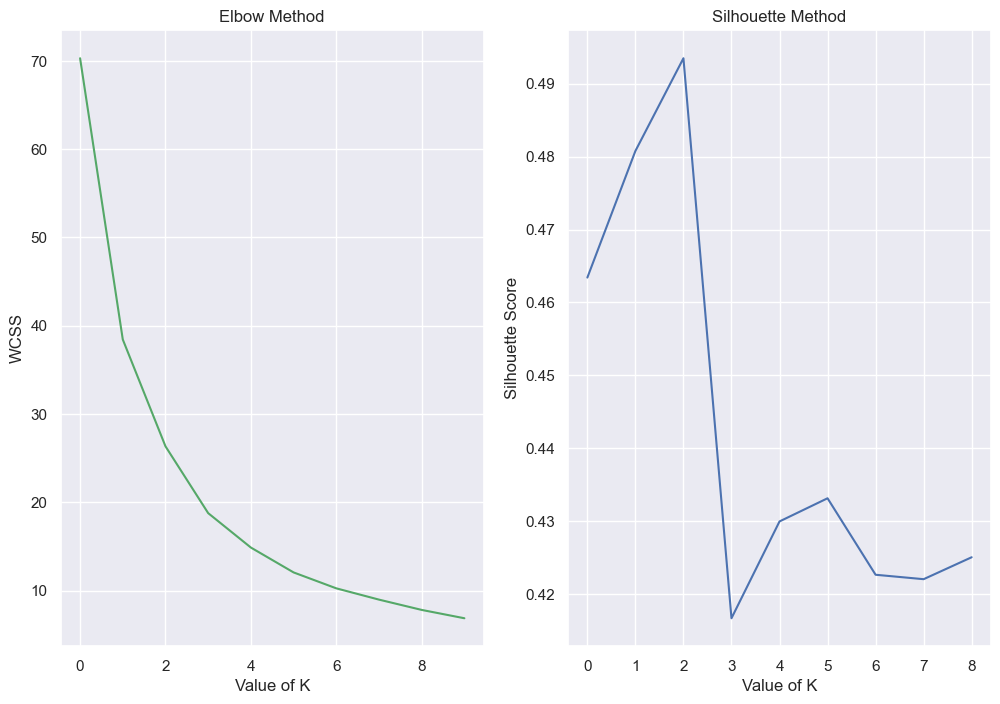

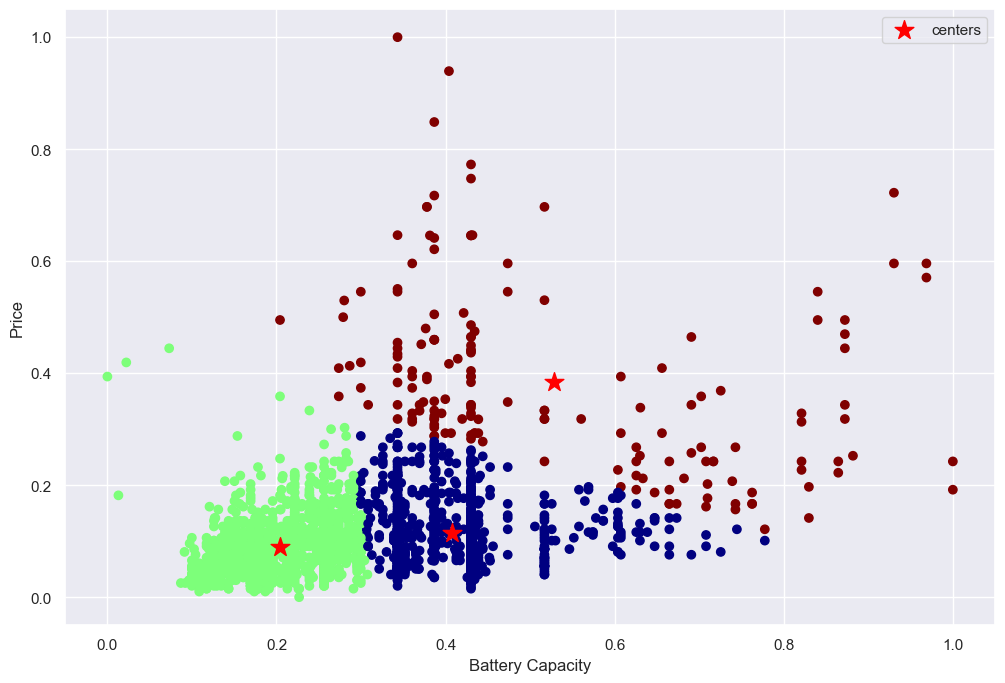

In [243]:
wcss = list()
silhouette = list()
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(X_scaled, kmeans.labels_))
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].plot(wcss, c='g')
ax[0].set_xlabel('Value of K')
ax[0].set_ylabel('WCSS')
ax[0].set_title('Elbow Method')

ax[1].plot(silhouette, c='b')
ax[1].set_xlabel('Value of K')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Method')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
lables = kmeans.labels_
centers = kmeans.cluster_centers_
sns.set_theme()
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=lables, cmap='jet')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200, label='centers')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

# Section 3

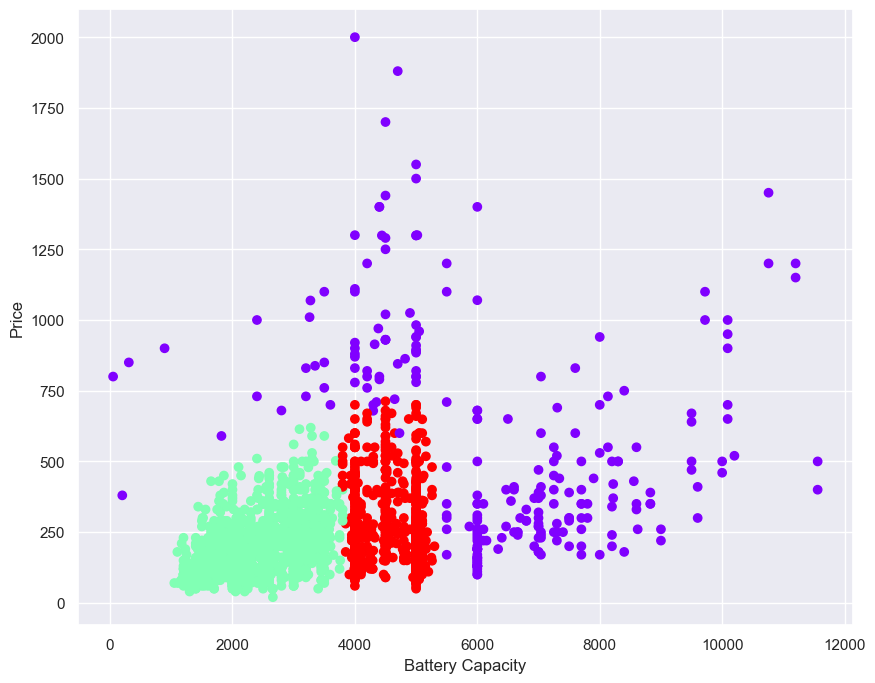

In [415]:
dbscan = DBSCAN(eps=200, min_samples=50)
dbscan.fit(X)
lables = dbscan.labels_
plt.figure(figsize=(10, 8))
plt.scatter(X['battery_capacity'], X['Price'], c=lables, cmap='rainbow')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.show()